In [1]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
import pprint
import matplotlib.cm as cm

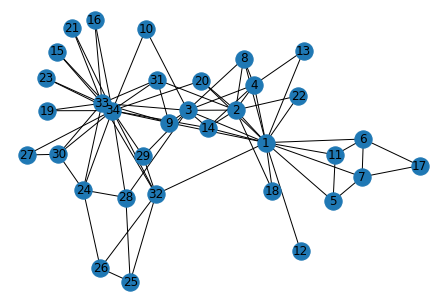

In [2]:
G=nx.Graph()
edge=[(2, 1),(3, 1),(4, 1),(5, 1),(6, 1),(7, 1),(8, 1),(9, 1),(11, 1),(12, 1),(13, 1),(14, 1),(18, 1),(20, 1),
      (22, 1),(32, 1),(3, 2),(4, 2),(8, 2),(14, 2),(18, 2),(20, 2),(22, 2),(31, 2),(4, 3),(8, 3),(9, 3),(10, 3),
      (14, 3),(28, 3),(29, 3),(33, 3),(8, 4),(13, 4),(14, 4),(7, 5),(11, 5),(7, 6),(11, 6),(17, 6),(17, 7),(31, 9),
      (33, 9),(34, 9),(34, 10),(34, 14),(33, 15),(34, 15),(33, 16),(34, 16),(33, 19),(34, 19),(34, 20),(33, 21),
      (34, 21),(33, 23),(34, 23),(26, 24),(28, 24),(30, 24),(33, 24),(34, 24),(26, 25),(28, 25),(32, 25),(32, 26),
      (30, 27),(34, 27),(34, 28),(32, 29),(34, 29),(33, 30),(34, 30),(33, 31),(34, 31),(33, 32),(34, 32),(34, 33)]
G.add_edges_from(edge)
nx.draw(G,with_labels=1)

In [3]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion={}
for i in range(1,35):
    time_of_diffusion[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 4041.09it/s]


In [4]:
print(dict(sorted(time_of_diffusion.items())))

{1: 84, 2: 90, 3: 66, 4: 94, 5: 91, 6: 137, 7: 97, 8: 88, 9: 57, 10: 92, 11: 161, 12: 193, 13: 121, 14: 93, 15: 132, 16: 0, 17: 133, 18: 154, 19: 130, 20: 109, 21: 66, 22: 139, 23: 44, 24: 22, 25: 146, 26: 141, 27: 58, 28: 35, 29: 75, 30: 60, 31: 122, 32: 82, 33: 33, 34: 20}


In [8]:
#bc(betweeness centrality) value of each node in graph
bc=(nx.betweenness_centrality(G))
bc=dict(sorted(bc.items()))
print(bc)

{1: 0.4376352813852815, 2: 0.05393668831168831, 3: 0.14365680615680615, 4: 0.011909271284271283, 5: 0.0006313131313131313, 6: 0.02998737373737374, 7: 0.029987373737373736, 8: 0.0, 9: 0.05592682780182782, 10: 0.0008477633477633478, 11: 0.0006313131313131313, 12: 0.0, 13: 0.0, 14: 0.045863395863395856, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.03247504810004811, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.017613636363636363, 25: 0.0022095959595959595, 26: 0.0038404882154882162, 27: 0.0, 28: 0.022333453583453587, 29: 0.0017947330447330447, 30: 0.0029220779220779218, 31: 0.014411976911976905, 32: 0.13827561327561327, 33: 0.14524711399711404, 34: 0.30407497594997596}


In [9]:
#louvain method
from community import community_louvain
communities =community_louvain.best_partition(G)

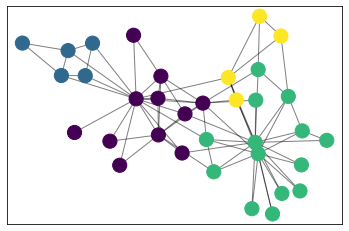

In [10]:
# visualization of clusters
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(communities.values()) + 1)
nx.draw_networkx_nodes(G, pos, communities.keys(), node_size=200,cmap=cmap, node_color=list(communities.values()),)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()